<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
X, y = fetch_openml("mnist_784", version=1,return_X_y=True,parser="auto")

In [4]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print("Training set size: ",len(X_train))
print("Test set size: ",len(X_test))

Training set size:  60000
Test set size:  10000


In [5]:
# X_train, X_test,y_train,y_test = train_test_split(X,y,train_size = 0.86)

In [6]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# X_train.value_counts(return_counts = True)
y_train.value_counts()

,count
class,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


In [8]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train,dtype="int8")
y_test = np.array(y_test,dtype="int8")


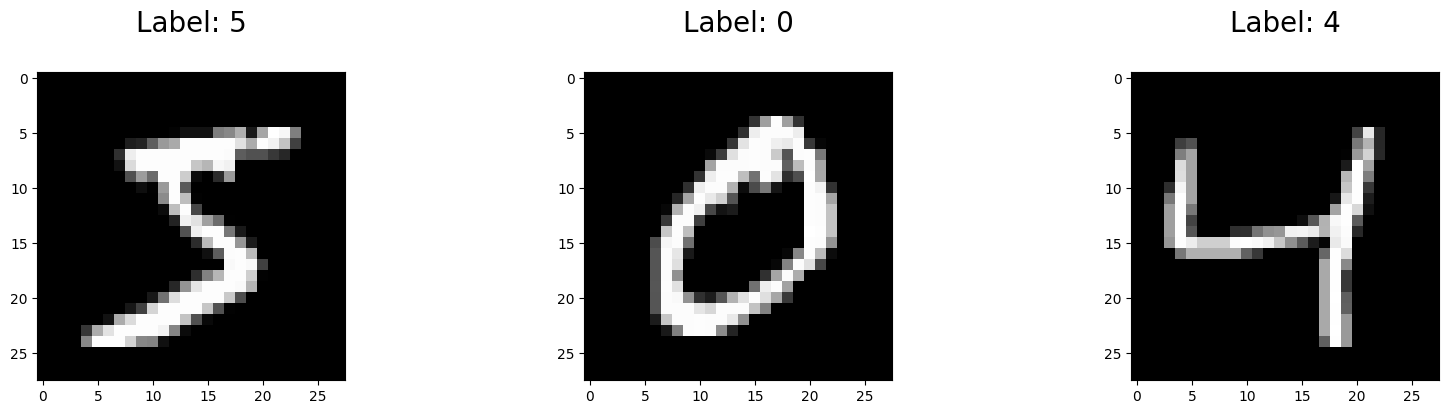

In [9]:
plt.figure(figsize=(20,4))
for ind, (img,label) in enumerate(zip(X_train[0:3], y_train[:3])):
  plt.subplot(1,3,ind+1)
  plt.imshow(np.reshape(img,(28,28)),cmap=plt.cm.gray)
  plt.title("Label: %s\n" % label,fontsize=20)

**MLP**

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,

)

In [12]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

**Evaluate on a hold-out dataset**

In [13]:
print("Train Accuracy: ",mlp.score(X_train,y_train))
print("Test Accuracy: ",mlp.score(X_test,y_test))

Train Accuracy:  0.9868
Test Accuracy:  0.97


In [14]:
preds = mlp.predict(X_test)

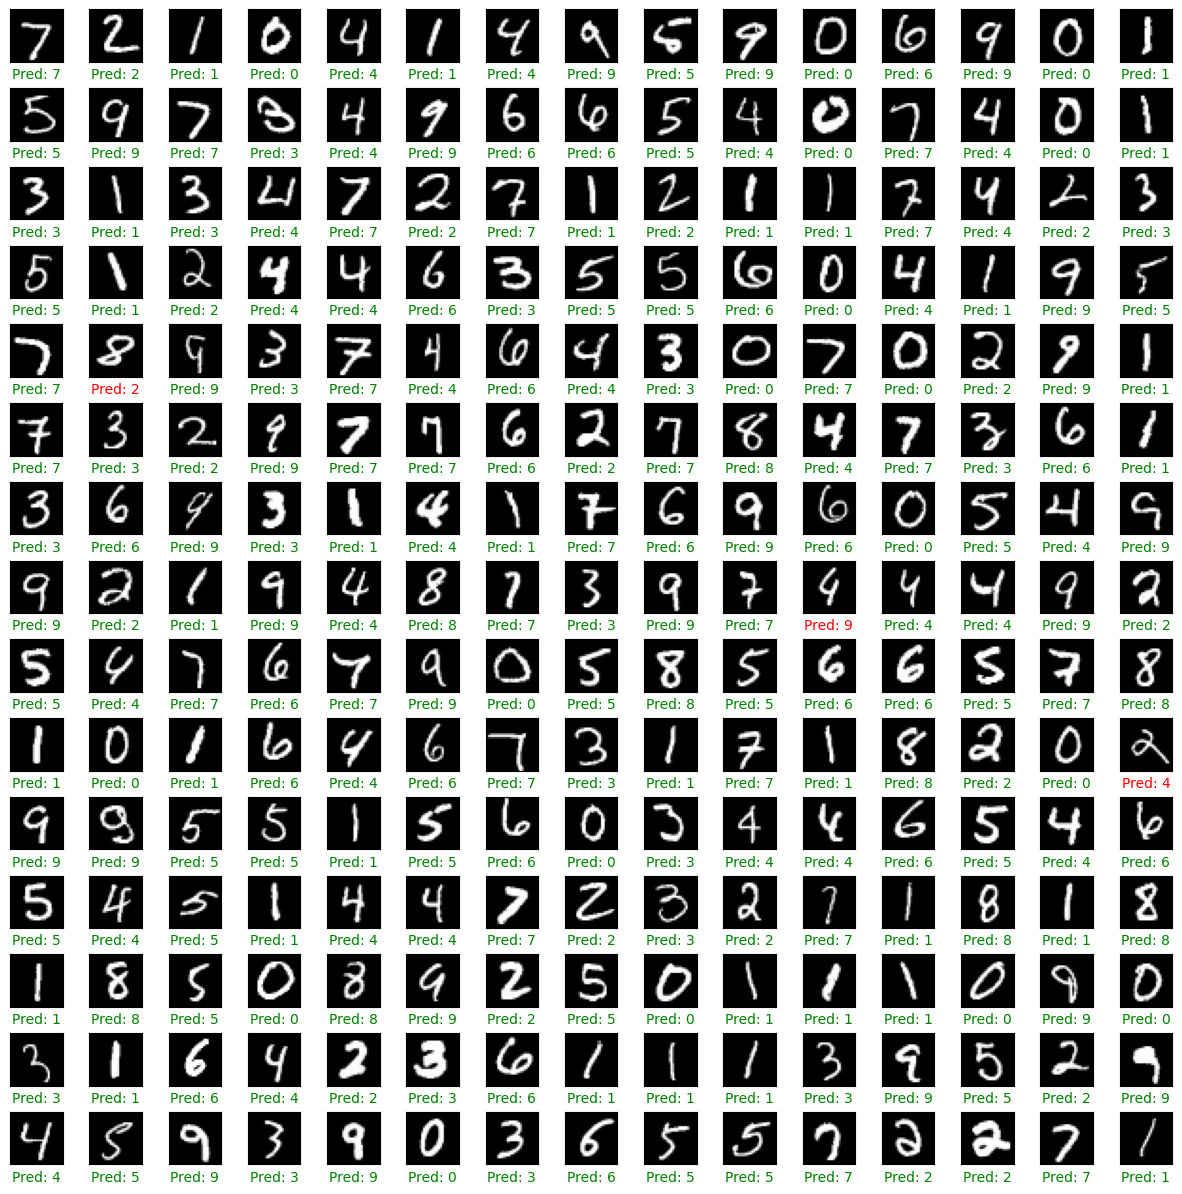

In [15]:
plt.figure(figsize=(15,15))

for ind, (img,pred,label) in enumerate(zip(X_test[:225],preds[:225],y_test[:225])):
  plt.subplot(15,15,ind+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(np.reshape(img,(28,28)), cmap=plt.cm.gray)
  fontcolor = "g" if pred==label else "r"
  # plt.title("Prediction: %i\n Label: %i\n" % (pred,label),fontsize=10,color=fontcolor)
  plt.xlabel(f"Pred: {pred}",color = fontcolor)

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()